# Estimation Theory
### (Case Study)

# 1. Sampling Distributions
Objective: Visualize and calculate sampling distributions for the means of the dataset.
* Tasks:
+ Randomly select samples of a fixed size.
+ Calculate the sample means.
+ Visualize the distribution of the sample means.



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

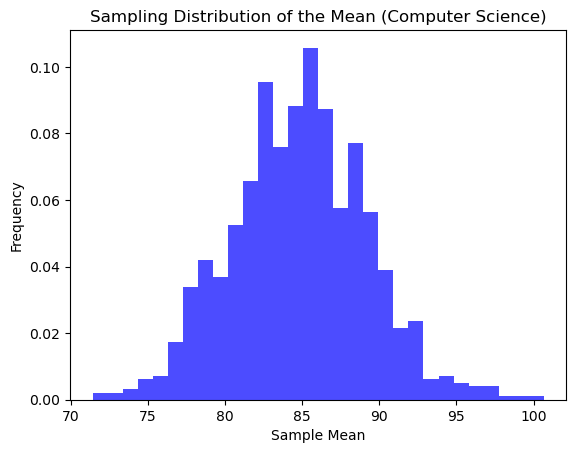

In [2]:
df = pd.read_csv("talent_hunt_scores.csv")

# Sampling distributions for 'Computer_Science'
sample_size = 5  # Size of each sample
num_samples = 1000  # Number of samples to generate

means = []
for _ in range(num_samples):
    sample = df["Computer_Science"].sample(sample_size, replace=True)
    means.append(sample.mean())

plt.hist(means, bins=30, density=True, alpha=0.7, color='blue')
plt.title("Sampling Distribution of the Mean (Computer Science)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


# 2. Central Limit Theorem
Objective:
To demonstrate that as sample size increases, the distribution of sample means approaches a normal distribution, regardless of the population's distribution.

* Tasks:
+ Draw samples of varying sizes.
+ Compute and plot the sampling distribution of the means for each sample size. 
+ Observe how the distribution becomes more normal with larger sample sizes.

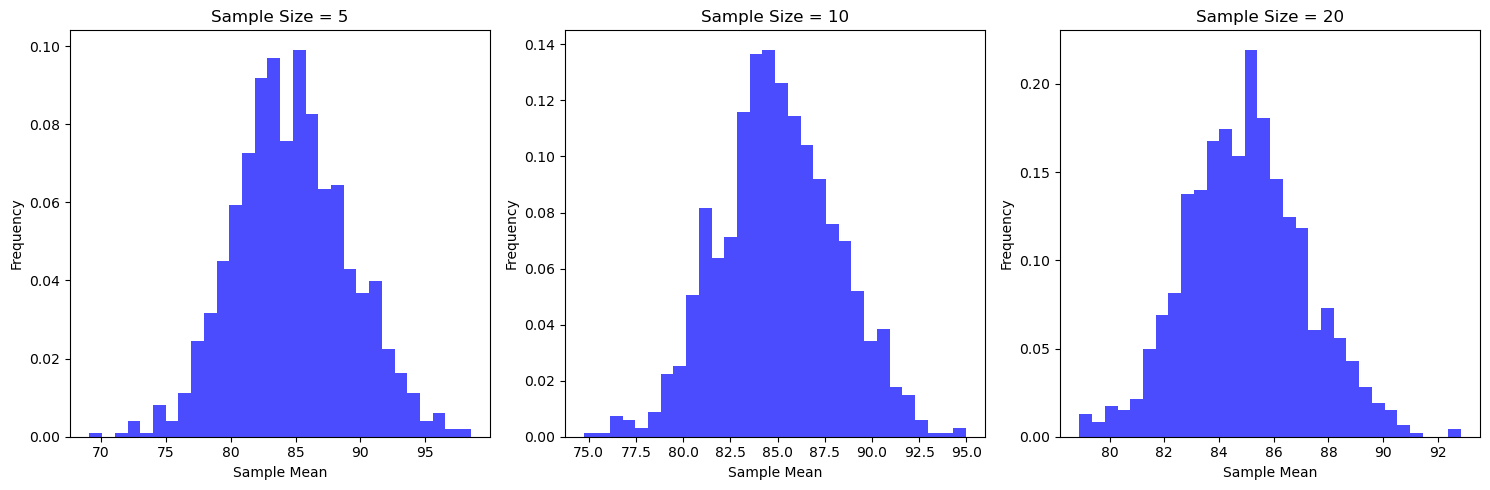

In [3]:
# Central Limit Theorem for different sample sizes
sample_sizes = [5, 10, 20]
plt.figure(figsize=(15, 5))

for i, size in enumerate(sample_sizes):
    means = []
    for _ in range(num_samples):
        sample = df["Computer_Science"].sample(size, replace=True)
        means.append(sample.mean())
    
    plt.subplot(1, len(sample_sizes), i + 1)
    plt.hist(means, bins=30, density=True, alpha=0.7, color='blue')
    plt.title(f"Sample Size = {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# 3. Estimation
Objective:
To estimate population parameters (mean, variance) using sample statistics.

* Tasks:
+ Calculate the sample mean and variance.
+ Use the sample statistics as point estimates for population parameters.

In [4]:
# Point Estimation: Population mean and variance estimation
for column in df.columns:
    sample = df[column]
    mean = sample.mean()
    variance = sample.var()
    print(f"{column}: Mean = {mean:.2f}, Variance = {variance:.2f}")


Computer_Science: Mean = 84.92, Variance = 98.04
Chemistry: Mean = 85.73, Variance = 95.37
Mathematics: Mean = 81.73, Variance = 109.59
Physics: Mean = 82.68, Variance = 105.33


# 4. Hypothesis Testing
Objective:
To test a hypothesis about a population parameter (e.g., the mean of Physics scores).

* Tasks:
+ State null (H0) and alternative (Ha) hypothesis.
+ Perfrom a t-test
+ Interpret the p-value

In [6]:
from scipy.stats import ttest_1samp

# Hypothesis: Mean of 'Physics' is 85
hypothesized_mean = 85
physics_scores = df["Physics"]

t_stat, p_value = ttest_1samp(physics_scores, hypothesized_mean)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The mean is not equal to 85.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 85.")


T-Statistic: -5.53
P-Value: 0.0000
Reject the null hypothesis: The mean is not equal to 85.


# 5. Type I & Type II Errors
Objective:
To illustrate Type I (false positive) and Type II (false negative) errors in hypothesis testing.

* Tasks:
+ Simulate data for a hypothesis test.
+ Explain scenarios leading to errors.
+ Compute probabilities of errors.

In [7]:
# Simulating Type I and Type II Errors
true_mean = 85
sample = np.random.normal(true_mean, 10, size=30)  # Simulated data
t_stat, p_value = ttest_1samp(sample, 90)  # Hypothesized mean = 90

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpret errors
if p_value < 0.05:
    print("Type I Error: Rejecting a true null hypothesis.")
else:
    print("Type II Error: Failing to reject a false null hypothesis.")


T-Statistic: -3.25
P-Value: 0.0029
Type I Error: Rejecting a true null hypothesis.


# 6. One-Tailed & Two-Tailed Tests
Objective:
To perform and compare one-tailed and two-tailed tests on the dataset.

* Tasks:
+ Conduct a one-tailed test.
+ Conduct a two-tailed test.
+ Compare results.

In [8]:
# One-tailed test: Is the mean of 'Mathematics' greater than 80?
t_stat, p_value = ttest_1samp(df["Mathematics"], 80)
p_value_one_tailed = p_value / 2  # Divide p-value for one-tailed

if t_stat > 0 and p_value_one_tailed < 0.05:
    print("Reject the null hypothesis (One-Tailed): Mean > 80.")
else:
    print("Fail to reject the null hypothesis (One-Tailed).")

# Two-tailed test
if p_value < 0.05:
    print("Reject the null hypothesis (Two-Tailed): Mean != 80.")
else:
    print("Fail to reject the null hypothesis (Two-Tailed).")


Reject the null hypothesis (One-Tailed): Mean > 80.
Reject the null hypothesis (Two-Tailed): Mean != 80.


# 7. Confidence Interval vs Hypothesis Testing
Objective:
To compute confidence intervals and compare them to hypothesis testing results.

* Tasks:
+ Calculate confidence intervals for a subject.
+ Perform hypothesis testing and relate results.

In [9]:
from scipy.stats import t

# Confidence interval for 'Chemistry'
chemistry_scores = df["Chemistry"]
n = len(chemistry_scores)
mean = chemistry_scores.mean()
std_err = chemistry_scores.std(ddof=1) / np.sqrt(n)
confidence = 0.95
t_critical = t.ppf((1 + confidence) / 2, df=n-1)

margin_of_error = t_critical * std_err
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"95% Confidence Interval for Chemistry: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Hypothesis Testing: Is mean = 90 within the interval?
if lower_bound <= 90 <= upper_bound:
    print("Fail to reject the null hypothesis: 90 is within the confidence interval.")
else:
    print("Reject the null hypothesis: 90 is outside the confidence interval.")


95% Confidence Interval for Chemistry: [84.94, 86.51]
Reject the null hypothesis: 90 is outside the confidence interval.
